In [1]:
import datetime

import numpy as np

from src.data_handler import CoinDataStore
from src.simple_wash_detector_utils import detect_wash_trades_nearest

In [2]:
store = CoinDataStore("AVAX", engine="fastparquet")
time_diff_s = 1 * 60 # 10 minutes difference
price_diff_pct = 0.01
size_diff_pct = 0.01

# df_detected = detect_wash_trades_nearest(store, time_diff_s, price_diff_pct, size_diff_pct)
# df_detected

In [2]:
store = CoinDataStore("AVAX", engine="fastparquet")
df_all = store.load_all()
df_all

,price,size,time,seller,buyer
0,19.521999,213.199997,2025-03-22 10:50:22.930512310,8,658
1,19.521999,1.000000,2025-03-22 10:50:23.731759790,19,658
2,19.525999,11.820000,2025-03-22 10:50:43.490273671,161,1260
3,19.525999,39.150002,2025-03-22 10:50:43.490273671,161,19500
4,19.525000,8.800000,2025-03-22 10:50:43.490273671,161,240
...,...,...,...,...,...
1478242,24.966999,1.210000,2025-07-27 08:44:33.762000000,8,1527
1478243,24.971001,308.359985,2025-07-27 08:44:59.437000000,161,5135
1478244,24.971001,203.639999,2025-07-27 08:44:59.437000000,892,5135
1478245,24.971001,11.940000,2025-07-27 08:45:07.130000000,19,170117


In [4]:
import datetime

In [99]:
import numpy as np
df_check = df_detected.sort_values("duration_s").reset_index(drop=True)
df_check

,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
0,19,2025-03-22,2025-03-22 21:37:53.000,2025-03-22 21:37:53.000,0.0,sell,buy,19.514000,19.514997,0.000051,57.939999,57.939999,0.000000,sell_to_buy,4
1,30529,2025-04-22,2025-04-22 07:09:21.550,2025-04-22 07:09:21.550,0.0,buy,sell,19.672001,19.671000,0.000051,0.510000,0.510000,0.000000,buy_to_sell,6239
2,626,2025-06-16,2025-06-16 22:37:52.850,2025-06-16 22:37:52.850,0.0,buy,sell,19.671000,19.670000,0.000051,19.000000,19.000000,0.000000,buy_to_sell,17897
3,8,2025-04-02,2025-04-02 15:42:02.850,2025-04-02 15:42:02.850,0.0,buy,sell,19.695002,19.697001,0.000101,66.839996,66.839996,0.000000,buy_to_sell,1689
4,41,2025-05-04,2025-05-04 13:17:23.200,2025-05-04 13:17:23.200,0.0,sell,buy,20.000999,19.969999,0.001550,18.110001,18.110001,0.000000,sell_to_buy,7794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25414,19508,2025-04-26,2025-04-26 02:29:15.600,2025-04-26 02:30:15.600,60.0,buy,sell,22.841999,22.834000,0.000350,21.879999,21.900000,0.000914,buy_to_sell,7000
25415,22,2025-06-13,2025-06-13 01:07:16.950,2025-06-13 01:08:16.950,60.0,buy,sell,19.083000,19.028999,0.002830,23.980000,23.980000,0.000000,buy_to_sell,17225
25416,685,2025-06-13,2025-06-13 01:07:16.950,2025-06-13 01:08:16.950,60.0,sell,buy,19.083000,19.028999,0.002830,23.980000,23.980000,0.000000,sell_to_buy,17538
25417,19529,2025-03-25,2025-03-25 00:42:30.100,2025-03-25 00:43:30.100,60.0,buy,sell,21.643999,21.608000,0.001663,0.470000,0.470000,0.000000,buy_to_sell,742


In [105]:
i = 0
indexes_to_check = np.astype((np.floor(np.linspace(0, len(df_detected) - 1, num=10))), "int", )

In [146]:
df_check.loc[[indexes_to_check[i]]]

,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
8472,818,2025-04-07,2025-04-07 14:40:10.950,2025-04-07 14:40:21.050,10.1,buy,sell,16.209,16.219652,0.000657,77.120003,77.160004,0.000519,buy_to_sell,3320


In [148]:
df_all[
    (df_all["time"] >= df_check.at[indexes_to_check[i], "open_time"] - datetime.timedelta(seconds=5))
    # &
    # ((df_all["seller"] == df_check.at[indexes_to_check[i], "wallet_id"]) | (df_all["buyer"] == df_check.at[indexes_to_check[i], "wallet_id"]))
].head(60)

,price,size,time,seller,buyer
170724,16.208000,39.630001,2025-04-07 14:40:07.571160115,22847,19900
170725,16.208000,33.000000,2025-04-07 14:40:08.061304083,42734,19
170726,16.208000,9.630000,2025-04-07 14:40:08.061304083,42734,161
170727,16.208000,6.170000,2025-04-07 14:40:08.061304083,42734,88
170748,16.179001,232.600006,2025-04-07 14:40:10.902486986,4934,301
170754,16.211000,36.349998,2025-04-07 14:40:10.902486986,4934,19
170753,16.184999,1056.439941,2025-04-07 14:40:10.902486986,4934,2086
170749,16.198999,411.970001,2025-04-07 14:40:10.902486986,4934,1529
170751,16.209000,47.200001,2025-04-07 14:40:10.902486986,4934,41
170750,16.219999,32.000000,2025-04-07 14:40:10.902486986,4934,37


In [142]:
i += 1

In [10]:
df_detected

,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
0,8,2025-03-22,2025-03-22 12:22:36.650,2025-03-22 12:25:59.450,202.80,buy,sell,19.433001,19.415001,0.000926,1.010000,1.010000,0.000000e+00,buy_to_sell,0
1,8,2025-03-22,2025-03-22 13:48:26.900,2025-03-22 13:49:26.300,59.40,buy,sell,19.362000,19.357000,0.000258,0.790000,0.790000,0.000000e+00,buy_to_sell,1
2,8,2025-03-22,2025-03-22 19:43:30.450,2025-03-22 19:46:45.400,194.95,sell,buy,19.658001,19.635002,0.001170,42.290001,42.529999,5.675050e-03,sell_to_buy,2
3,8,2025-03-22,2025-03-22 20:10:04.500,2025-03-22 20:10:51.100,46.60,sell,buy,19.652000,19.658001,0.000305,6.960000,6.950000,1.436814e-03,sell_to_buy,3
4,8,2025-03-22,2025-03-22 21:06:57.250,2025-03-22 21:06:57.350,0.10,buy,sell,19.582001,19.582001,0.000000,9.430000,9.410000,2.120939e-03,buy_to_sell,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59748,75319,2025-07-27,2025-07-27 05:47:51.700,2025-07-27 05:51:09.050,197.35,buy,sell,25.157833,25.119278,0.001533,384.740021,384.739990,7.932000e-08,buy_to_sell,59748
59749,168961,2025-07-27,2025-07-27 00:36:43.650,2025-07-27 00:37:53.850,70.20,buy,sell,24.940001,24.930000,0.000401,0.640000,0.640000,0.000000e+00,buy_to_sell,59749
59750,172595,2025-07-27,2025-07-27 07:57:57.800,2025-07-27 07:59:34.200,96.40,sell,buy,25.021999,25.038002,0.000640,0.400000,0.400000,0.000000e+00,sell_to_buy,59750
59751,178577,2025-07-27,2025-07-27 07:35:36.000,2025-07-27 07:37:57.850,141.85,buy,sell,25.031000,25.041000,0.000400,16.250000,16.250000,0.000000e+00,buy_to_sell,59751


In [26]:
df_detected["profit"] = (df_detected["close_price"] - df_detected["open_price"]) * ((df_detected["open_side"] == "buy") * 2 - 1)

In [28]:
wash_vol = np.minimum(df_detected["open_size"], df_detected["close_size"]).astype("float32")

In [29]:
grp = df_detected.assign(wash_vol=wash_vol).groupby("wallet_id", sort=False)

In [39]:
agg = grp.agg(
    n_pairs=("wallet_id", "size"),
    active_days=("day", lambda s: s.nunique()),
    wash_volume=("open_size", "sum"),
    median_dt_s=("duration_s", "median"),
    size_pct_min=("size_change_pct", "min"),
    size_pct_median=("size_change_pct", "median"),
    size_pct_max=("size_change_pct", "max"),
    profit_min=("profit", "min"),
    profit_mean=("profit", "median"),
    profit_max=("profit", "max"),
    profit_std=("profit", "std"),
    positive_profit_pct=("profit", lambda s: (s >= 0).mean() * 100)
).reset_index()

In [40]:
agg.sort_values("wash_volume", ascending=False, inplace=True)

In [47]:
agg[agg["positive_profit_pct"] > 75]

,wallet_id,n_pairs,active_days,wash_volume,median_dt_s,size_pct_min,size_pct_median,size_pct_max,profit_min,profit_mean,profit_max,profit_std,positive_profit_pct
435,1844,52,27,94253.601562,205.800,0.000000,0.000000,1.445030e-04,-0.221001,0.045000,0.229000,0.077293,78.846154
148,658,66,34,75453.843750,274.275,0.000000,0.000000,7.841709e-08,-0.121000,0.048499,0.203997,0.061175,80.303030
30,23,818,115,43251.167969,137.875,0.000000,0.000000,8.833900e-03,-0.204000,0.027000,0.233999,0.061170,75.672372
197,285,47,33,19275.109375,301.600,0.000086,0.002974,9.278587e-03,-0.135000,0.058588,0.223867,0.065611,82.978723
551,2281,9,7,12140.269531,6.400,0.000000,0.000000,9.285738e-08,0.004347,0.020086,0.060820,0.017331,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,170373,1,1,0.440000,230.200,0.000000,0.000000,0.000000e+00,0.099998,0.099998,0.099998,NaN,100.000000
2005,170431,1,1,0.420000,427.150,0.000000,0.000000,0.000000e+00,0.167000,0.167000,0.167000,NaN,100.000000
246,49041,1,1,0.110000,280.600,0.000000,0.000000,0.000000e+00,0.063002,0.063002,0.063002,NaN,100.000000
324,4514,1,1,0.090000,355.800,0.000000,0.000000,0.000000e+00,0.038000,0.038000,0.038000,NaN,100.000000


In [48]:
agg[agg["wallet_id"] == 19]

,wallet_id,n_pairs,active_days,wash_volume,median_dt_s,size_pct_min,size_pct_median,size_pct_max,profit_min,profit_mean,profit_max,profit_std,positive_profit_pct
1,19,1313,128,17809.460938,77.2,0.0,0.000508,0.01,-0.171,0.000999,0.228001,0.03072,57.425743


In [7]:
import pandas as pd

pd.read_csv("/home/asevlad/program_files/github_asevlad/Hyperliquid_Wash_Trading_detection/server_analysis/ETH/simple_detector/plots_dfwash_general/wash_trade_summary.csv")

,Unnamed: 0,Category,Count,Count %,Volume,Volume %,Avg Price,Avg Size
0,0,Wash Trades,4032066,14.511459,3.917368e+10,16.647291,2446.4631,4.081006
1,1,Non-Wash Trades,23753328,85.488541,1.961420e+11,83.352707,2663.8127,3.365068
2,2,Total,27785394,100.000000,2.353157e+11,100.000000,2526.5645,3.461198


# Randomize time

In [56]:
store = CoinDataStore("AVAX", engine="fastparquet")
time_diff_s = 1 * 60 # 1 minute difference
price_diff_pct = 0.01
size_diff_pct = 0.01

df_detected = detect_wash_trades_nearest(store, time_diff_s, price_diff_pct, size_diff_pct)
df_detected

,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
0,8,2025-03-22,2025-03-22 13:48:26.900,2025-03-22 13:49:26.300,59.40,buy,sell,19.362000,19.357000,0.000258,0.790000,0.790000,0.000000,buy_to_sell,0
1,8,2025-03-22,2025-03-22 20:10:04.500,2025-03-22 20:10:51.100,46.60,sell,buy,19.652000,19.658001,0.000305,6.960000,6.950000,0.001437,sell_to_buy,1
2,8,2025-03-22,2025-03-22 21:06:57.250,2025-03-22 21:06:57.350,0.10,buy,sell,19.582001,19.582001,0.000000,9.430000,9.410000,0.002121,buy_to_sell,2
3,19,2025-03-22,2025-03-22 21:37:53.000,2025-03-22 21:37:53.000,0.00,buy,sell,19.514997,19.514000,0.000051,57.939999,57.939999,0.000000,buy_to_sell,3
4,88,2025-03-22,2025-03-22 13:55:41.650,2025-03-22 13:56:02.100,20.45,sell,buy,19.405001,19.408001,0.000155,3.940000,3.940000,0.000000,sell_to_buy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786,15857,2025-07-27,2025-07-27 00:00:24.500,2025-07-27 00:00:31.900,7.40,buy,sell,24.979000,24.961002,0.000721,0.690000,0.690000,0.000000,buy_to_sell,21786
21787,15857,2025-07-27,2025-07-27 00:07:37.850,2025-07-27 00:08:31.300,53.45,buy,sell,24.947998,24.927002,0.000842,0.690000,0.690000,0.000000,buy_to_sell,21787
21788,22514,2025-07-27,2025-07-27 06:52:33.400,2025-07-27 06:53:23.600,50.20,sell,buy,25.155001,25.174999,0.000795,0.400000,0.400000,0.000000,sell_to_buy,21788
21789,22514,2025-07-27,2025-07-27 06:59:24.400,2025-07-27 07:00:06.550,42.15,sell,buy,25.200003,25.194000,0.000238,0.400000,0.400000,0.000000,sell_to_buy,21789


In [57]:
from src.simple_wash_detector_utils import _one_direction_pair, _to_long_per_wallet, _aggregate_microfills_long, \
    _prune_pairs_greedy_no_reuse
import pandas as pd

all_events = []

np.random.seed(71)
days = store.list_days()

for day in days:
    df_day = store.load_days([day])
    df_day["time"] = df_day["time"].apply(lambda x: x + datetime.timedelta(seconds = np.random.randint(-20 * 60, 20 * 60)) )

    if df_day.empty:
        continue

    # A) Long view per wallet (buy/sell events)
    long_df = _to_long_per_wallet(df_day)
    if long_df.empty:
        continue

    # B) Aggregate micro-fills
    agg = _aggregate_microfills_long(long_df)
    if agg.empty:
        continue

    df = agg.sort_values("time").reset_index(drop=True).copy()
    df["row_id"] = np.arange(len(df), dtype=np.int64)  # stable within day
    df["day"] = df["time"].dt.date

    buys  = df[df["side"] == "buy"].copy()
    sells = df[df["side"] == "sell"].copy()

    # C) Two directions
    d1 = _one_direction_pair(buys,  sells, time_diff_s, price_diff_pct, size_diff_pct, "buy_to_sell")
    d2 = _one_direction_pair(sells, buys,  time_diff_s, price_diff_pct, size_diff_pct, "sell_to_buy")

    day_events = pd.concat([d1, d2], ignore_index=True)
    if not day_events.empty:
        # Instead of relying on drop_duplicates in each direction, apply global pruning:
        day_events = _prune_pairs_greedy_no_reuse(
            day_events,
            sort_cols=("wallet_id", "duration_s", "price_change_pct"),
            ascending=(True, True, True)
        )
        all_events.append(day_events)

if all_events:
    events = pd.concat(all_events, ignore_index=True)
    events = events.sort_values(["day","wallet_id","open_time","close_time"]).reset_index(drop=True)

    # Assign a simple pair_id (one row == one pair)
    events["pair_id"] = np.arange(len(events), dtype=np.int64)

    # Final tidy order
    events = events[
        [
            "wallet_id","day",
            "open_time","close_time","duration_s",
            "open_side","close_side",
            "open_price","close_price","price_change_pct",
            "open_size","close_size","size_change_pct",
            "pairing_direction",
            "pair_id",
        ]
    ]
else:
    print("No wash trading detected")

In [58]:
events

,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
0,8,2025-03-22,2025-03-22 12:50:57.900,2025-03-22 12:51:41.400,43.50,sell,buy,19.386999,19.440001,0.002734,1.69,1.70,0.005917,sell_to_buy,0
1,8,2025-03-22,2025-03-22 14:15:54.350,2025-03-22 14:16:31.500,37.15,sell,buy,19.372000,19.358999,0.000671,0.89,0.89,0.000000,sell_to_buy,1
2,8,2025-03-22,2025-03-22 14:51:36.050,2025-03-22 14:51:50.900,14.85,buy,sell,19.268999,19.316999,0.002491,31.77,32.00,0.007240,buy_to_sell,2
3,19,2025-03-22,2025-03-22 12:38:52.550,2025-03-22 12:39:23.650,31.10,buy,sell,19.434000,19.431000,0.000154,0.81,0.81,0.000000,buy_to_sell,3
4,88,2025-03-22,2025-03-22 15:18:01.150,2025-03-22 15:18:07.100,5.95,buy,sell,19.355000,19.379000,0.001240,5.17,5.16,0.001934,buy_to_sell,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18773,22514,2025-07-27,2025-07-27 03:42:42.200,2025-07-27 03:43:33.600,51.40,sell,buy,24.934999,24.955000,0.000802,0.41,0.41,0.000000,sell_to_buy,18773
18774,22514,2025-07-27,2025-07-27 05:52:56.300,2025-07-27 05:53:50.150,53.85,buy,sell,25.143002,25.148001,0.000199,0.40,0.40,0.000000,buy_to_sell,18774
18775,22514,2025-07-27,2025-07-27 05:55:15.100,2025-07-27 05:55:20.700,5.60,buy,sell,25.128000,25.153000,0.000995,0.40,0.40,0.000000,buy_to_sell,18775
18776,22514,2025-07-27,2025-07-27 07:17:57.400,2025-07-27 07:18:37.450,40.05,sell,buy,25.200003,25.049000,0.005992,0.40,0.40,0.000000,sell_to_buy,18776


In [62]:
events["open_size"].sum() / df_detected["open_size"].sum() * 100

np.float32(83.67989)

In [64]:
events["open_size"].sum() / df_all["size"].sum() * 100

np.float32(1.1100388)

# Randomize size of trade

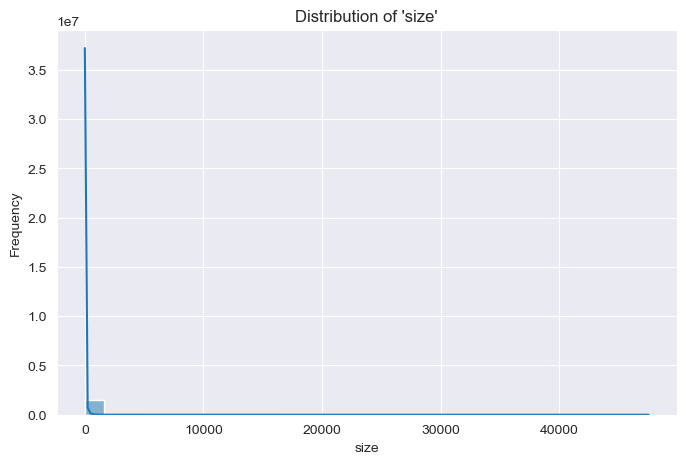

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = df_all.copy()
plt.figure(figsize=(8,5))
sns.histplot(df["size"], bins=30, kde=True)
plt.title("Distribution of 'size'")
plt.xlabel("size")
plt.ylabel("Frequency")
plt.show()


In [67]:
df = df.iloc[:1000].copy()
data = df["size"].dropna()

# Fit distributions
dist_names = ['norm', 'lognorm', 'expon', 'gamma']
results = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    param = dist.fit(data)

    # Compute Kolmogorov–Smirnov test statistic
    ks_stat, ks_p = stats.kstest(data, dist_name, args=param)
    results.append((dist_name, ks_stat, ks_p))

# Sort by smallest KS statistic
results = sorted(results, key=lambda x: x[1])
for r in results:
    print(f"{r[0]:10s}  KS stat={r[1]:.4f},  p-value={r[2]:.4f}")


lognorm     KS stat=0.0761,  p-value=0.0000
norm        KS stat=0.3063,  p-value=0.0000
expon       KS stat=0.3125,  p-value=0.0000
gamma       KS stat=0.9704,  p-value=0.0000


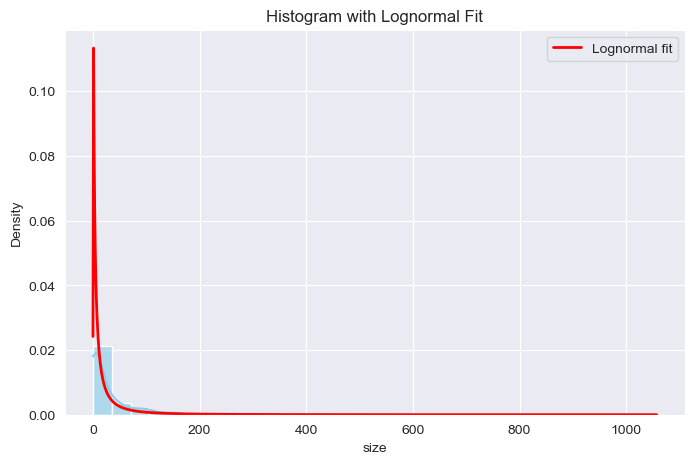

In [68]:
best_fit = stats.lognorm
params = best_fit.fit(data)

x = np.linspace(min(data), max(data), 1000)
pdf = best_fit.pdf(x, *params)

plt.figure(figsize=(8,5))
sns.histplot(data, bins=30, stat="density", color='skyblue', alpha=0.6, kde=True)
plt.plot(x, pdf, 'r-', lw=2, label="Lognormal fit")
plt.legend()
plt.title("Histogram with Lognormal Fit")
plt.show()


In [69]:
# Histogram-based sampling (discrete approximation + inverse transform)
n_sim = df_all.shape[0]
df = df_all.copy()
data = df["size"].dropna()
counts, bin_edges = np.histogram(data, bins=20000)
probs = counts / counts.sum()
# sample bin indices then uniform inside bin
bin_idx = np.random.choice(len(probs), size=n_sim, p=probs)
simulated_size = np.random.uniform(bin_edges[bin_idx], bin_edges[bin_idx+1])

In [70]:
df_test = df_all.copy()
df_test["size"] = simulated_size
df_test

,price,size,time,seller,buyer
0,19.521999,16.876093,2025-03-22 10:50:22.930512310,8,658
1,19.521999,25.569767,2025-03-22 10:50:23.731759790,19,658
2,19.525999,2498.140776,2025-03-22 10:50:43.490273671,161,1260
3,19.525999,59.215976,2025-03-22 10:50:43.490273671,161,19500
4,19.525000,0.328506,2025-03-22 10:50:43.490273671,161,240
...,...,...,...,...,...
1478242,24.966999,1.961963,2025-07-27 08:44:33.762000000,8,1527
1478243,24.971001,7.977996,2025-07-27 08:44:59.437000000,161,5135
1478244,24.971001,0.380984,2025-07-27 08:44:59.437000000,892,5135
1478245,24.971001,123.327801,2025-07-27 08:45:07.130000000,19,170117


In [71]:
from src.simple_wash_detector_utils import _one_direction_pair, _to_long_per_wallet, _aggregate_microfills_long, \
    _prune_pairs_greedy_no_reuse
import pandas as pd

all_events = []

np.random.seed(71)
days = store.list_days()

for day in days:
    df_day = store.load_days([day])
    n_sim = df_day.shape[0]
    bin_idx = np.random.choice(len(probs), size=n_sim, p=probs)
    simulated_size = np.random.uniform(bin_edges[bin_idx], bin_edges[bin_idx+1])
    df_day["size"] = simulated_size

    if df_day.empty:
        continue

    # A) Long view per wallet (buy/sell events)
    long_df = _to_long_per_wallet(df_day)
    if long_df.empty:
        continue

    # B) Aggregate micro-fills
    agg = _aggregate_microfills_long(long_df)
    if agg.empty:
        continue

    df = agg.sort_values("time").reset_index(drop=True).copy()
    df["row_id"] = np.arange(len(df), dtype=np.int64)  # stable within day
    df["day"] = df["time"].dt.date

    buys  = df[df["side"] == "buy"].copy()
    sells = df[df["side"] == "sell"].copy()

    # C) Two directions
    d1 = _one_direction_pair(buys,  sells, time_diff_s, price_diff_pct, size_diff_pct, "buy_to_sell")
    d2 = _one_direction_pair(sells, buys,  time_diff_s, price_diff_pct, size_diff_pct, "sell_to_buy")

    day_events = pd.concat([d1, d2], ignore_index=True)
    if not day_events.empty:
        # Instead of relying on drop_duplicates in each direction, apply global pruning:
        day_events = _prune_pairs_greedy_no_reuse(
            day_events,
            sort_cols=("wallet_id", "duration_s", "price_change_pct"),
            ascending=(True, True, True)
        )
        all_events.append(day_events)

if all_events:
    events = pd.concat(all_events, ignore_index=True)
    events = events.sort_values(["day","wallet_id","open_time","close_time"]).reset_index(drop=True)

    # Assign a simple pair_id (one row == one pair)
    events["pair_id"] = np.arange(len(events), dtype=np.int64)

    # Final tidy order
    events = events[
        [
            "wallet_id","day",
            "open_time","close_time","duration_s",
            "open_side","close_side",
            "open_price","close_price","price_change_pct",
            "open_size","close_size","size_change_pct",
            "pairing_direction",
            "pair_id",
        ]
    ]
else:
    print("No wash trading detected")

In [72]:
events

,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
0,8,2025-03-22,2025-03-22 12:08:02.350,2025-03-22 12:08:37.600,35.25,sell,buy,19.464001,19.472000,0.000411,27.021317,27.153019,0.004874,sell_to_buy,0
1,8,2025-03-22,2025-03-22 15:54:51.050,2025-03-22 15:55:04.300,13.25,buy,sell,19.538000,19.534000,0.000205,17.899439,17.754850,0.008078,buy_to_sell,1
2,8,2025-03-23,2025-03-23 09:21:39.350,2025-03-23 09:22:08.450,29.10,buy,sell,19.539000,19.530001,0.000461,7.643381,7.650776,0.000968,buy_to_sell,2
3,8,2025-03-23,2025-03-23 17:04:57.950,2025-03-23 17:05:18.050,20.10,buy,sell,19.587999,19.586000,0.000102,23.833748,23.956718,0.005160,buy_to_sell,3
4,19,2025-03-23,2025-03-23 03:54:50.000,2025-03-23 03:54:55.600,5.60,sell,buy,19.656000,19.660000,0.000203,1.441812,1.443092,0.000888,sell_to_buy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,8,2025-07-26,2025-07-26 13:09:48.950,2025-07-26 13:09:57.750,8.80,buy,sell,24.309999,24.302999,0.000288,76.845627,76.410332,0.005665,buy_to_sell,996
997,8,2025-07-26,2025-07-26 22:34:28.400,2025-07-26 22:35:09.450,41.05,sell,buy,25.023998,25.046000,0.000879,84.960297,85.582062,0.007318,sell_to_buy,997
998,534,2025-07-26,2025-07-26 19:58:59.850,2025-07-26 19:59:57.650,57.80,buy,sell,25.443302,25.458570,0.000600,63.745834,64.183159,0.006860,buy_to_sell,998
999,2341,2025-07-26,2025-07-26 02:30:10.900,2025-07-26 02:30:33.950,23.05,buy,sell,24.125999,24.107000,0.000787,1.901639,1.894496,0.003756,buy_to_sell,999


In [94]:
print(f"""
Randomized sizes of trades decreased wash trading amount from {df_detected.open_size.sum() / 1000:.2f} K to {events.open_size.sum() / 1000:.2f} K.
Which is {events.open_size.sum() / df_detected.open_size.sum() * 100:.2f} %
""".strip()
      )

Randomized sizes of trades decreased wash trading amount from 1085.46 K to 48.84 K.
Which is 4.50 %


In [95]:
print(f"""
Randomized sizes of trades decreased wash trading amount to {events.open_size.sum() / 1000:.2f} K out of {df_all["size"].sum() / 1000:.2f} K total size.
Which is {events["open_size"].sum() / df_all["size"].sum() * 100:.2f} %
""".strip()
      )

Randomized sizes of trades decreased wash trading amount to 48.84 K out of 81827.14 K total size.
Which is 0.06 %


# test

In [3]:
import pandas as pd

records = [
    ["A", "B"],
    ["B", "A"],
    ["A", "B"],
    ["B", "A"],
    ["A", "B"],
    ["B", "A"],
    ["A", "B"],
    ["B", "A"],
    ["A", "B"],
    ["B", "A"],

    ["B", "C"],
    ["C", "A"],

    ["D", "E"],
    ["E", "D"],
]

df_test = pd.DataFrame(records, columns=["seller", "buyer"])
for seller_id, seller in enumerate(["A", "B", "C", "D", "E"]):

    df_test.seller = df_test.seller.str.replace(seller, f"{seller_id}")
    df_test.buyer = df_test.buyer.str.replace(seller, f"{seller_id}")

df_test.seller = df_test.seller.astype(int)
df_test.buyer = df_test.buyer.astype(int)
df_test = df_test.reset_index().rename(columns={"index": "time"})
df_test["price"] = 10
df_test["size"] = 10
df_test["time"] = df_test.time.apply(lambda x: datetime.datetime.now() + datetime.timedelta(seconds=x))

In [14]:
from src.simple_wash_detector_utils import _one_direction_pair, _to_long_per_wallet, _aggregate_microfills_long, \
    _prune_pairs_greedy_no_reuse
import pandas as pd

all_events = []

df_day = df_test.copy()
df_day["time"] = df_day["time"].apply(lambda x: x + datetime.timedelta(seconds = np.random.randint(0, 40 * 60)))

# A) Long view per wallet (buy/sell events)
long_df = _to_long_per_wallet(df_day)
# if long_df.empty:
#     continue

# B) Aggregate micro-fills
agg = _aggregate_microfills_long(long_df)
# if agg.empty:
#     continue

df = agg.sort_values("time").reset_index(drop=True).copy()
df["row_id"] = np.arange(len(df), dtype=np.int64)  # stable within day
df["day"] = df["time"].dt.date

buys  = df[df["side"] == "buy"].copy()
sells = df[df["side"] == "sell"].copy()

# C) Two directions
d1 = _one_direction_pair(buys,  sells, time_diff_s, price_diff_pct, size_diff_pct, "buy_to_sell")
d2 = _one_direction_pair(sells, buys,  time_diff_s, price_diff_pct, size_diff_pct, "sell_to_buy")

day_events = pd.concat([d1, d2], ignore_index=True)
if not day_events.empty:
    # Instead of relying on drop_duplicates in each direction, apply global pruning:
    day_events = _prune_pairs_greedy_no_reuse(
        day_events,
        sort_cols=("wallet_id", "duration_s", "price_change_pct"),
        ascending=(True, True, True)
    )

events = pd.concat(all_events, ignore_index=True)
events = events.sort_values(["day","wallet_id","open_time","close_time"]).reset_index(drop=True)

# Assign a simple pair_id (one row == one pair)
events["pair_id"] = np.arange(len(events), dtype=np.int64)

# Final tidy order
events = events[
    [
        "wallet_id","day",
        "open_time","close_time","duration_s",
        "open_side","close_side",
        "open_price","close_price","price_change_pct",
        "open_size","close_size","size_change_pct",
        "pairing_direction",
        "pair_id",
    ]
]

2 5
set()
6 9
{2, 5}
11 12
{9, 2, 5, 6}
14 17
{2, 5, 6, 9, 11, 12}
1 2
{2, 5, 6, 9, 11, 12, 14, 17}
5 6
{2, 5, 6, 9, 11, 12, 14, 17}
9 11
{2, 5, 6, 9, 11, 12, 14, 17}
12 14
{2, 5, 6, 9, 11, 12, 14, 17}
17 18
{2, 5, 6, 9, 11, 12, 14, 17}
0 3
{2, 5, 6, 9, 11, 12, 14, 17}
4 7
{0, 2, 3, 5, 6, 9, 11, 12, 14, 17}
8 10
{0, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 17}
13 15
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17}
16 19
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
3 4
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}
7 8
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}
10 13
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}
15 16
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}
21 23
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}
24 26
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23}
25 27
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 26}


,wallet_id,day,open_time,close_time,duration_s,open_side,close_side,open_price,close_price,price_change_pct,open_size,close_size,size_change_pct,pairing_direction,pair_id
0,0,2025-10-21,2025-10-21 09:28:02.600,2025-10-21 09:28:03.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,0
1,0,2025-10-21,2025-10-21 09:28:04.600,2025-10-21 09:28:05.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,1
2,0,2025-10-21,2025-10-21 09:28:06.600,2025-10-21 09:28:07.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,2
3,0,2025-10-21,2025-10-21 09:28:08.600,2025-10-21 09:28:09.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,3
4,1,2025-10-21,2025-10-21 09:28:01.600,2025-10-21 09:28:02.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,4
5,1,2025-10-21,2025-10-21 09:28:03.600,2025-10-21 09:28:04.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,5
6,1,2025-10-21,2025-10-21 09:28:05.600,2025-10-21 09:28:06.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,6
7,1,2025-10-21,2025-10-21 09:28:07.600,2025-10-21 09:28:08.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,7
8,1,2025-10-21,2025-10-21 09:28:09.600,2025-10-21 09:28:10.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,8
9,2,2025-10-21,2025-10-21 09:28:11.600,2025-10-21 09:28:12.600,1.0,buy,sell,10.0,10.0,0.0,10.0,10.0,0.0,buy_to_sell,9
